# Seattle 2014 Crime Reports - Hour Analysis

We''re looking at the [crime data collected in 2014 in Seattle, WA](https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/seattle_incidents_summer_2014.csv?raw=true). 
An interesting visualization might be to plot crimes by hour.  

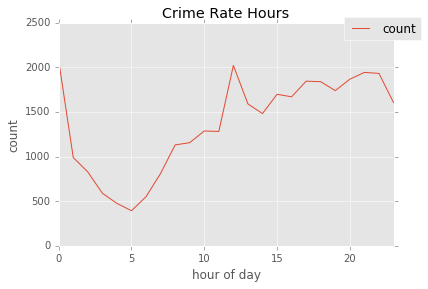

In [32]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dtype={'Date Reported': datetime, 'Occurred Date or Date Range Start': datetime,'Occurred Date Range End': datetime}
c = pd.read_csv('seattle_incidents_summer_2014.csv', index_col=0, parse_dates=True, low_memory=False )
c["Occurred Date or Date Range Start"] = pd.to_datetime(c["Occurred Date or Date Range Start"])
c.set_index("Occurred Date or Date Range Start", inplace=True)
c['h'] = c.index.hour
    
fig = plt.figure()
ax = plt.subplot(111)

grp_agg = c.groupby('h').size()
grp_agg.plot(x='h',label='count').set_title('Crime Rate Hours')

ax.set_xlabel("hour of day")
ax.set_ylabel("count")
plt.legend(loc='best',bbox_to_anchor=(1.1, 1.05))
plt.show()

First conclusion we can draw is that the probability of crime occuring in Seattle in 2014 was lowest at 5am. Are criminals nocturnal? By breaking down this plot into crime types, can we infer anymore from the data? Below, we see that Car Prowl's are common in Seattle, WA and are most frequent in the late evening and early mornings. 

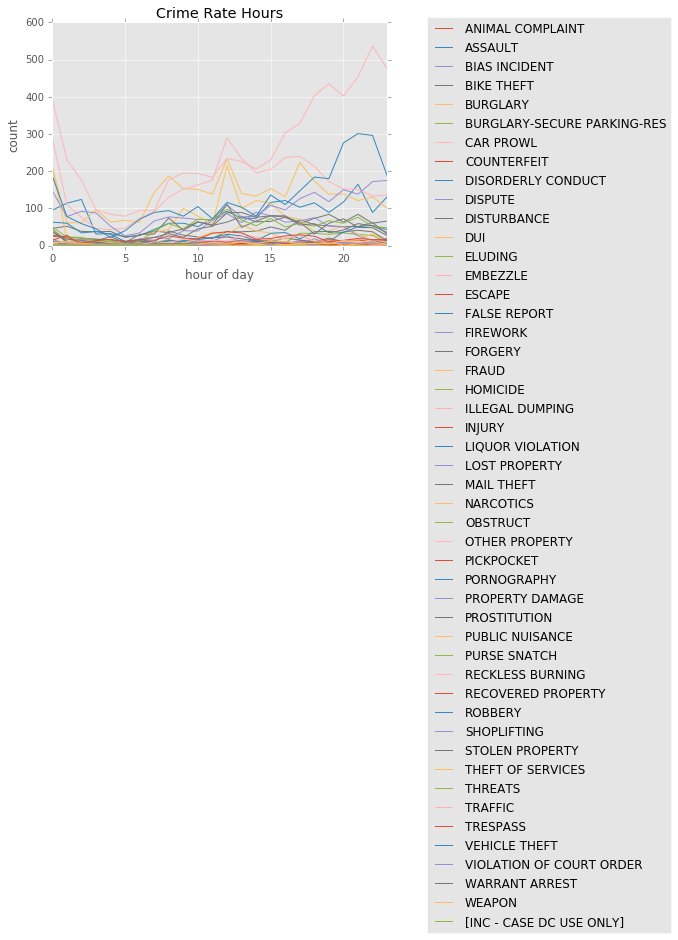

In [30]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dtype={'Date Reported': datetime, 'Occurred Date or Date Range Start': datetime,'Occurred Date Range End': datetime}
c = pd.read_csv('seattle_incidents_summer_2014.csv', index_col=0, parse_dates=True, low_memory=False )
c["Occurred Date or Date Range Start"] = pd.to_datetime(c["Occurred Date or Date Range Start"])
c.set_index("Occurred Date or Date Range Start", inplace=True)
c['h'] = c.index.hour
    
fig = plt.figure()
ax = plt.subplot(111)

for key, grp in c.groupby('Summarized Offense Description'):
    grp_agg = grp.groupby('h').size()
    grp_agg.plot(x='h',label='{k}'.format(k=key)).set_title('Crime Rate Hours')

ax.set_xlabel("hour of day")
ax.set_ylabel("count")
plt.legend(loc='best',bbox_to_anchor=(1.1, 1.05))
plt.show()